# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo? 


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**: 
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="100px" />
 </div>

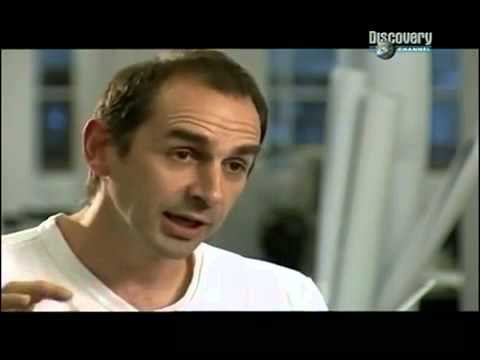

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="210px" height="70px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l} 
\end{align} 

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como 
\begin{equation}
x(t) = A \cos(\omega_{0} t) + B \sin(\omega_{0} t)
\end{equation}
Y su primera derivada (velocidad) sería 
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?** 

In [2]:
def pos(t,w0):
    A=0.1
    B=0
    return A*np.cos(w0*t)+B*np.sin(w0*t)
def vel(t,w0):
    A=0.1
    B=0
    return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

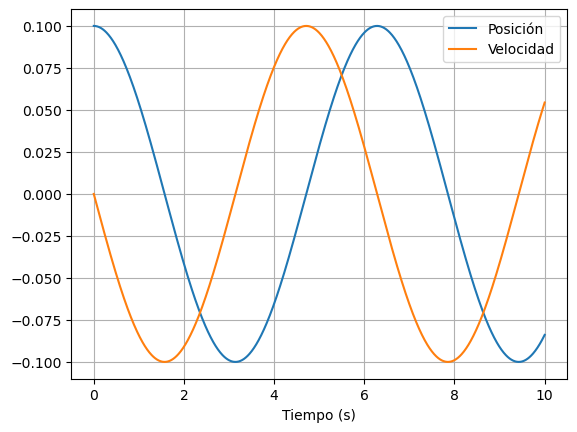

In [4]:
t=np.linspace(0,10,1000)
w0=1

x=pos(t,w0)
v=vel(t,w0)

plt.plot(t,x,label='Posición')
plt.plot(t,v,label='Velocidad')
plt.xlabel('Tiempo (s)')
plt.legend()
plt.grid()

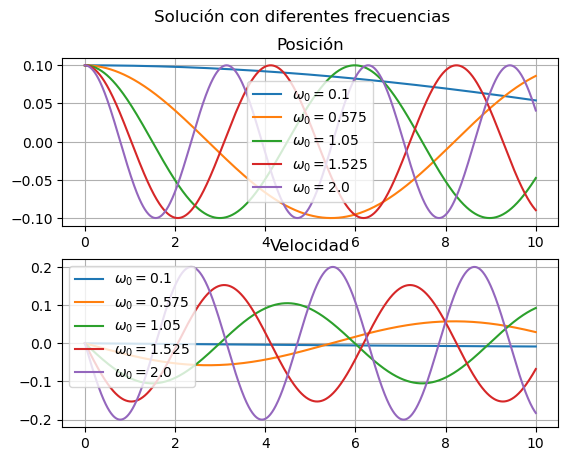

In [5]:
# Variando 'w0'
W=np.linspace(0.1,2,5)
fig=plt.figure()
fig.suptitle('Solución con diferentes frecuencias')               # Título de la figura
ax=fig.add_subplot(211) # (No_renglones, No_columnas, Pos_imagen)
ax.set_title('Posición')                                          # Título de la primera imagen
for w0 in W:
    x=pos(t,w0)
    ax.plot(t,x,label='$\omega_0={}$'.format(w0))
ax.legend()
ax.grid()
ax=fig.add_subplot(212)
ax.set_title('Velocidad')                                         # Título de la segunda imagen
for w0 in W:
    v=vel(t,w0)
    ax.plot(t,v,label='$\omega_0={}$'.format(w0))
ax.legend()
ax.grid()

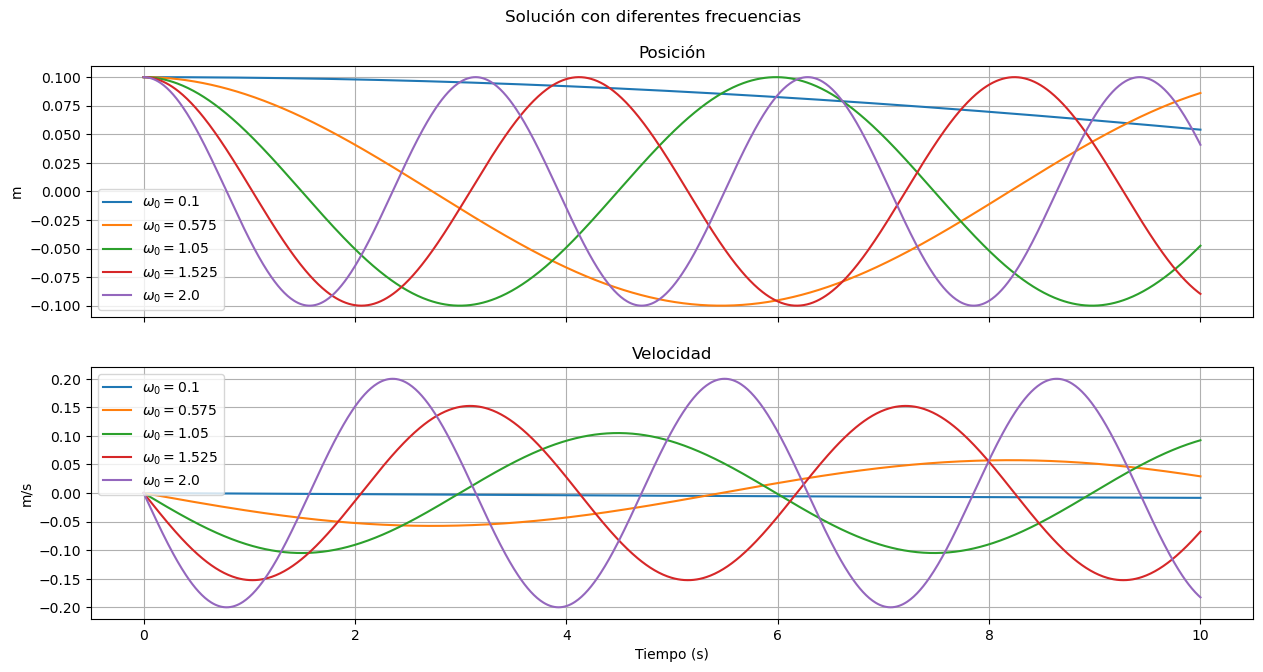

In [6]:
#fig,ax=plt.subplots(2,1)
fig=plt.figure(figsize=(15,7))                      #
gs=fig.add_gridspec(2,1,hspace=0.2,top=0.9)         #
ax=gs.subplots()                                    #
fig.suptitle('Solución con diferentes frecuencias')
for w0 in W:
    x=pos(t,w0)
    v=vel(t,w0)
    ax[0].plot(t,x,label='$\omega_0={}$'.format(w0))
    ax[1].plot(t,v,label='$\omega_0={}$'.format(w0))
ax[0].set(title='Posición',ylabel='m')
ax[1].set(title='Velocidad',xlabel='Tiempo (s)',ylabel='m/s')
for axis in ax:
    axis.label_outer()   # Para mostrar etiquetas externas
    axis.legend()
    axis.grid()

In [7]:
import matplotlib as mpl
# mpl.defaultParams # Cuidaho

**Plano de fase**

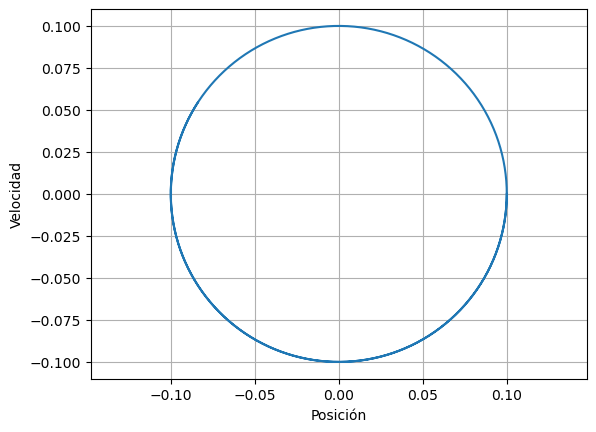

In [8]:
w0=1
t=np.linspace(0,10,1000)
x=pos(t,w0)
v=vel(t,w0)
plt.plot(x,v)
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.axis('equal')
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

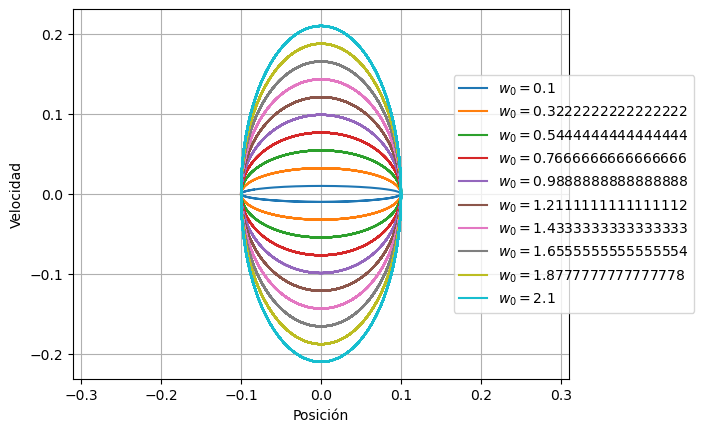

In [9]:
W=np.linspace(0.1,2.1,10)
t=np.linspace(0,100,10000)
for w0 in W:
    x=pos(t,w0)
    v=vel(t,w0)
    plt.plot(x,v,label='$w_0={}$'.format(w0))
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.axis('equal')
plt.legend(loc=10,bbox_to_anchor=(1.01,0.5))
plt.grid()

In [10]:
#plt.legend?

'''
===============   =============
Location String   Location Code
===============   =============
'best'            0
'upper right'     1
'upper left'      2
'lower left'      3
'lower right'     4
'right'           5
'center left'     6
'center right'    7
'lower center'    8
'upper center'    9
'center'          10
===============   =============
'''

"\n===============   =============\nLocation String   Location Code\n===============   =============\n'best'            0\n'upper right'     1\n'upper left'      2\n'lower left'      3\n'lower right'     4\n'right'           5\n'center left'     6\n'center right'    7\n'lower center'    8\n'upper center'    9\n'center'          10\n===============   =============\n"

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo
La posición y velocidad para el sistema `masa-resorte` se escriben como: 
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

Importemos la clase `interact` e `interact_manual`

In [11]:
def pos(t,x0,x0p,w0):
    return x0*np.cos(w0*t)+x0p/w0*np.sin(w0*t)
def vel(t,x0,x0p,w0):
    return -w0*x0*np.sin(w0*t)+x0p*np.cos(w0*t)

In [12]:
from ipywidgets import *

In [13]:
#interact?

In [14]:
def grafico(x0=1,x0p=0,w0=1):
    t=np.linspace(0,20,1000)
    x=pos(t,x0,x0p,w0)
    v=vel(t,x0,x0p,w0)
    plt.plot(t,x,label='Posición')
    plt.plot(t,v,label='Velocidad')
    plt.legend()
    plt.axis([0,20,-1.2,1.2])
    plt.grid()
interact_manual(grafico,x0=(0.1,1,0.1),x0p=(-0.5,0.5,0.1),w0=fixed(1))

interactive(children=(FloatSlider(value=1.0, description='x0', max=1.0, min=0.1), FloatSlider(value=0.0, descr…

<function __main__.grafico(x0=1, x0p=0, w0=1)>

**Actividad:** Crear un gráfico interactivo para variar la posición inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

In [15]:
# Decorador
@interact(x0=fixed(1),x0p=(-0.5,0.5,0.1),w0=(0.1,2,0.1))
def grafico(x0=1,x0p=0,w0=1):
    t=np.linspace(0,20,1000)
    x=pos(t,x0,x0p,w0)
    v=vel(t,x0,x0p,w0)
    plt.plot(t,x,label='Posición')
    plt.plot(t,v,label='Velocidad')
    plt.legend()
    plt.axis([0,20,-2,2])
    plt.grid()

interactive(children=(FloatSlider(value=0.0, description='x0p', max=0.5, min=-0.5), FloatSlider(value=1.0, des…

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

In [16]:
from matplotlib.animation import FuncAnimation

In [17]:
# FuncAnimation?

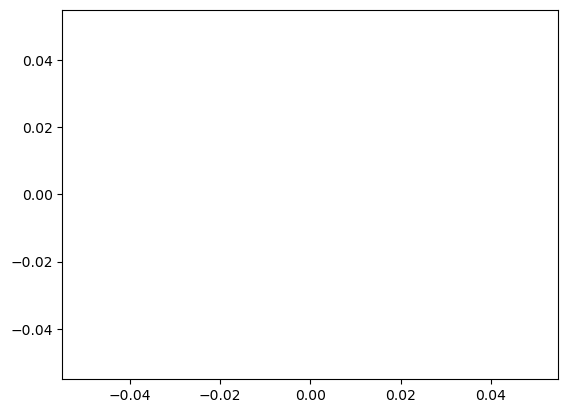

In [18]:
# Obteniendo el iterable de tipo artist
line,=plt.plot([],[])                   # la coma despues de 'line' extrae el elemento de la lista de plt.plot
line

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t).
\end{align}

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


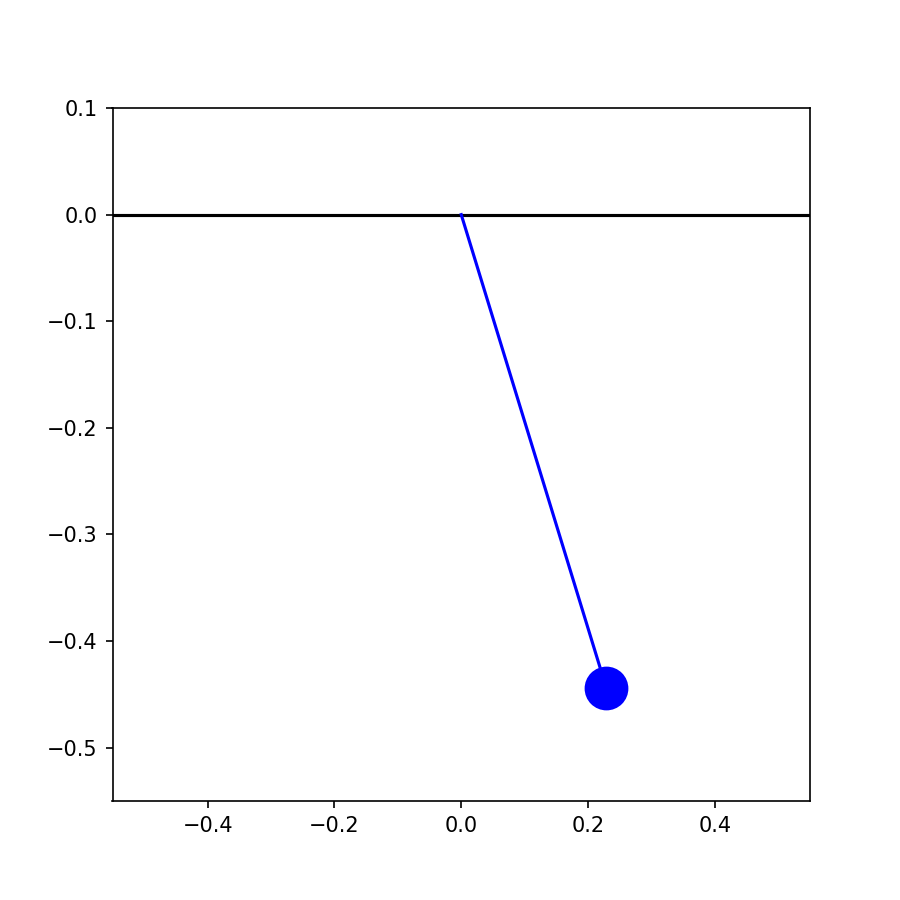

In [20]:
fig=plt.figure(figsize=(6,6))
def pendulo(t,th0,th0p,L):
    g=9.81
    w0=np.sqrt(g/L)
    th=th0*np.cos(w0*t)+th0p/w0*np.sin(w0*t)
    x=L*np.sin(th)
    y=-L*np.cos(th)
    # gráfico
    plt.cla() # limpiamos la gráfica
    line=plt.plot([-1.1*L,1.1*L],[0,0],'k',       # line[0]  ->  línea negra, soporte para el péndulo
                  [0,x],[0,y],'b',                # line[1]  ->  cuerpo del péndulo
                  x,y,'ob',ms=20)                 # line[2]  ->  masa del péndulo
    plt.axis([-1.1*L,1.1*L,-1.1*L,0.1])
    return line
t=np.linspace(0,10,100)
FuncAnimation(fig,pendulo,t,fargs=(0.5,0,0.5),interval=100,repeat=False)

Animación del sitema masa-resorte

In [24]:
def resorte(D,N=1,d=0.1,L=0.5):
    x=(D-2*d)/(2*(1+N))
    y=0.5*np.sqrt(L**2-x**2)
    rx=[0]
    ry=[0]
    rx.append(d)
    ry.append(0)
    
    rx.append(d+0.5*x)
    ry.append(y)
    
    rx.append(d+1.5*x)
    ry.append(-y)
    
    xa=d+1.5*x
    ya=-y
    for i in range(2*N):
        rx.append(xa+x)
        ry.append(ya*-1)
        
        xa=xa+x  # xa += x
        ya *= -1 # ya=ya*-1
        
        '''
        rx.append(xa+x)
        ry.append(ya*-1)
        
        xa+=x
        ya*=-1
        '''
    rx.append(xa+0.5*x)
    ry.append(0)
    
    rx.append(xa+0.5*x+d)
    ry.append(0)
    return np.array(rx),np.array(ry)

In [25]:
resorte(0.5)

(array([0.    , 0.1   , 0.1375, 0.2125, 0.2875, 0.3625, 0.4   , 0.5   ]),
 array([ 0.       ,  0.       ,  0.2471715, -0.2471715,  0.2471715,
        -0.2471715,  0.       ,  0.       ]))

<IPython.core.display.Javascript object>


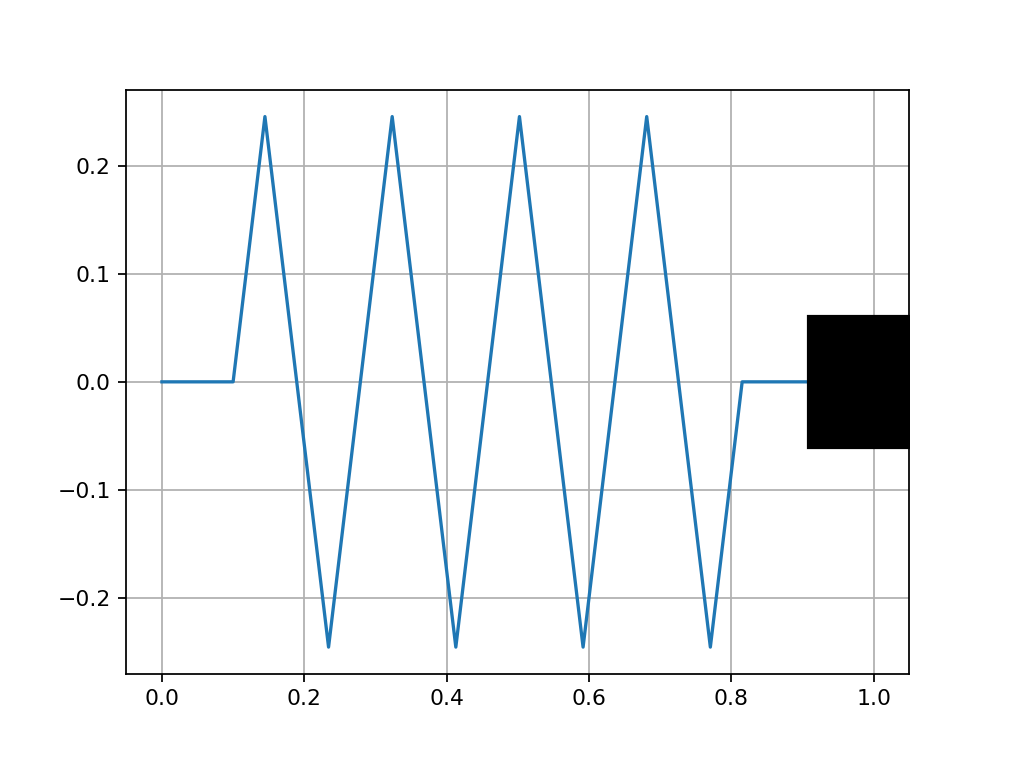

In [33]:
D=1
plt.plot(*resorte(D-0.085,N=3))
plt.plot([D],[0],'sk',ms=60)
plt.grid()

In [34]:
def pos(t,x0,x0p,w0):
    return x0*np.cos(w0*t)+x0p/w0*np.sin(w0*t)
def vel(t,x0,x0p,w0):
    return -w0*x0*np.sin(w0*t)+x0p*np.cos(w0*t)

In [35]:
# FuncAnimation?

<IPython.core.display.Javascript object>


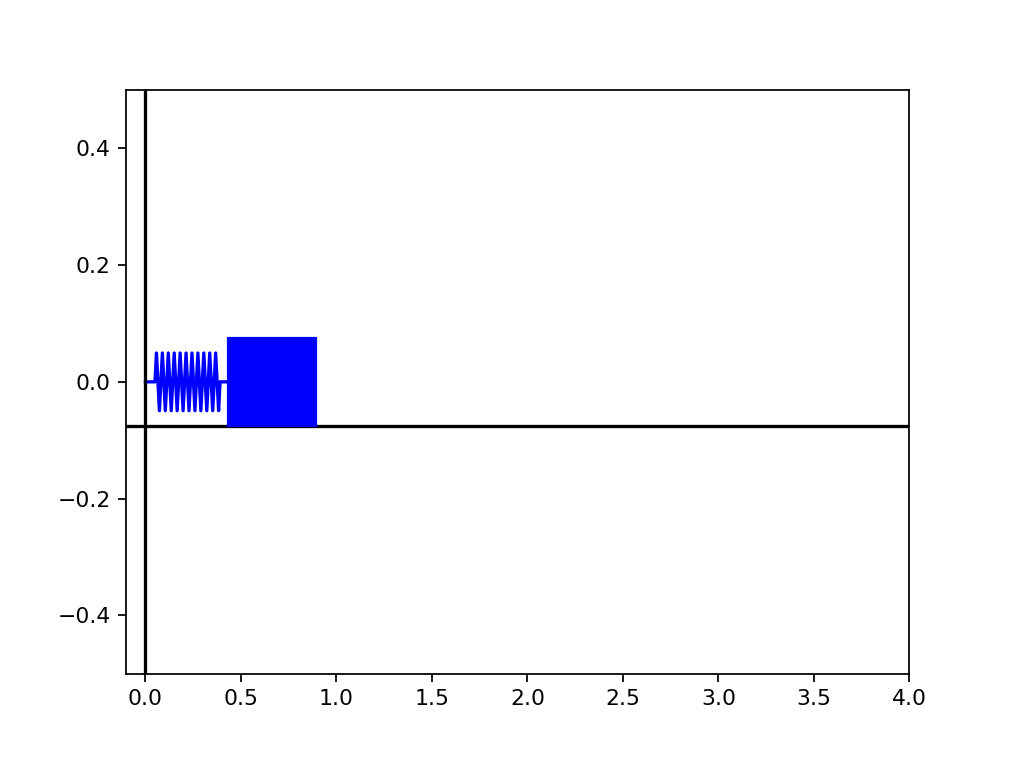

In [53]:
def anim(t,x0,x0p,m,K):
    plt.cla()
    plt.axis([-0.1,4,-0.5,0.5])
    w0=np.sqrt(K/m)
    x=pos(t,x0,x0p,w0)+1.5
    rx,ry=resorte(x-0.22,N=10,L=0.1,d=0.05)
    line=plt.plot(rx,ry,'b',[0,0],[-0.5,0.5],'k',[-0.1,4],[-0.075,-0.075],'k',x,0,'sb',ms=40)
    return line
fig=plt.figure()
t=np.linspace(0,10,100)
FuncAnimation(fig,anim,t,fargs=(1,0,1,1),interval=100,repeat=False)
#anim(0,1,0,1,1)